In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm, skew
import random
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef,make_scorer, roc_auc_score, roc_curve,confusion_matrix,ConfusionMatrixDisplay, roc_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import itertools
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten,LeakyReLU
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import plot_model

In [83]:
df_main = pd.read_csv(r'C:\Users\Nutzer\Desktop\BAExperiment\Payments_20240904.csv')

df_main.head()

,VOUCHER NUMBER,AMOUNT,CHECK DATE,DEPARTMENT NAME,CONTRACT NUMBER,VENDOR NAME,CASHED
0,PV27242780609,4260645.83,06/18/2024,NaN,DV,USI INSURANCE SERVICES LLC.,False
1,PV27232768083,94.55,12/29/2023,NaN,DV,PEARL KOCUR,False
2,CVIP232100094,152170.84,06/08/2023,DEPARTMENT OF HOUSING,190668,LAWYERS COMMITTEE FOR BETTER HOUSING,True
3,NaN,63250.00,2021,DEPT OF FAMILY AND SUPPORT SERVICES,117293,YOUNG MEN'S EDUCATIONAL NETWORK,True
4,NaN,38554.81,2021,NaN,124392,TRAVELERS & IMMIGRANTS AID'S HEARTLAND ALLIANC...,True


In [82]:
# Generate a sequence of numbers from 1 to 100
data_points = list(range(1, 101))

# Display the data points
print(data_points)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [49]:
import pandas as pd

# Load data from a CSV file
df = pd.read_csv(r'C:\Users\Nutzer\Desktop\BAExperiment\Payments_20240904.csv')

# Extract the first 100 data points
data_points = df.head(100)

# Display the data points
print(data_points)


   VOUCHER NUMBER      AMOUNT  CHECK DATE  \
0   PV27242780609  4260645.83  06/18/2024   
1   PV27232768083       94.55  12/29/2023   
2   CVIP232100094   152170.84  06/08/2023   
3             NaN    63250.00        2021   
4             NaN    38554.81        2021   
..            ...         ...         ...   
95            NaN    88970.71        2021   
96            NaN     6675.04        2012   
97  PV85238561645      750.00  08/29/2023   
98       Multiple      406.91  08/15/2022   
99  PV27232768077     3080.55  12/29/2023   

                         DEPARTMENT NAME CONTRACT NUMBER  \
0                                    NaN              DV   
1                                    NaN              DV   
2                  DEPARTMENT OF HOUSING          190668   
3    DEPT OF FAMILY AND SUPPORT SERVICES          117293   
4                                    NaN          124392   
..                                   ...             ...   
95  CHICAGO DEPARTMENT OF TRANSPORTATIO

In [6]:
import pandas as pd

# Load data from a CSV file
df = pd.read_csv(r'C:\Users\Nutzer\Desktop\BAExperiment\over250payments2024 (1).csv')

# Extract the first 100 data points
data_points = df.head(100)

# Display the data points
print(data_points)


       Organisation_Name                        Directorate  \
0   City of York Council          Customers and Communities   
1   City of York Council                      Public Health   
2   City of York Council                  Place Directorate   
3   City of York Council                  Place Directorate   
4   City of York Council  Adult Social Care and Integration   
..                   ...                                ...   
95  City of York Council  Adult Social Care and Integration   
96  City of York Council  Adult Social Care and Integration   
97  City of York Council  Adult Social Care and Integration   
98  City of York Council  Adult Social Care and Integration   
99  City of York Council  Adult Social Care and Integration   

                            Department                Service_Plan  \
0    Director Customer and Communities  ICT Operations and Bus Dev   
1                        Public Health       Healthy Child Service   
2   Environment Transport and Pla

## Label Encoder

In [6]:
import pandas as pd 

In [7]:
df=pd.read_csv(r'C:\Users\Nutzer\Desktop\BAExperiment\Payments_20240904.csv')

In [8]:
df.head()

,VOUCHER NUMBER,AMOUNT,CHECK DATE,DEPARTMENT NAME,CONTRACT NUMBER,VENDOR NAME,CASHED
0,PV27242780609,4260645.83,06/18/2024,NaN,DV,USI INSURANCE SERVICES LLC.,False
1,PV27232768083,94.55,12/29/2023,NaN,DV,PEARL KOCUR,False
2,CVIP232100094,152170.84,06/08/2023,DEPARTMENT OF HOUSING,190668,LAWYERS COMMITTEE FOR BETTER HOUSING,True
3,NaN,63250.00,2021,DEPT OF FAMILY AND SUPPORT SERVICES,117293,YOUNG MEN'S EDUCATIONAL NETWORK,True
4,NaN,38554.81,2021,NaN,124392,TRAVELERS & IMMIGRANTS AID'S HEARTLAND ALLIANC...,True


In [10]:
df.dtypes

VOUCHER NUMBER      object
AMOUNT             float64
CHECK DATE          object
DEPARTMENT NAME     object
CONTRACT NUMBER     object
VENDOR NAME         object
CASHED              object
dtype: object

In [11]:
df["VOUCHER NUMBER"].unique()

array(['PV27242780609', 'PV27232768083', 'CVIP232100094', ...,
       'PV27222763096', 'PV27222702155', 'PVRF212204731'], dtype=object)

In [12]:
df["CHECK DATE"].unique()

array(['06/18/2024', '12/29/2023', '06/08/2023', '2021', '11/16/2023',
       '06/02/2023', '2015', '2011', '2014', '2016', '03/29/2023',
       '06/05/2024', '03/02/2023', '2017', '2018', '12/28/2022',
       '06/20/2024', '2012', '03/11/2022', '08/29/2023', '08/15/2022',
       '2013', '12/01/2023', '05/28/2024', '05/03/2023', '04/07/2022',
       '04/06/2022', '06/21/2024', '12/27/2022', '03/27/2023',
       '03/17/2023', '05/02/2023', '05/26/2023', '06/05/2023',
       '11/10/2022', '03/16/2023', '08/16/2024', '08/09/2024',
       '08/08/2024', '10/24/2022', '06/11/2024', '06/12/2024',
       '06/13/2024', '07/13/2022', '06/10/2024', '03/26/2024',
       '04/08/2024', '03/21/2024', '03/22/2024', '04/04/2024',
       '12/18/2023', '12/27/2023', '12/22/2023', '11/29/2023',
       '12/14/2023', '12/26/2023', '06/07/2023', '10/19/2023',
       '05/31/2024', '12/13/2023', '06/14/2024', '12/28/2023',
       '04/25/2023', '12/05/2023', '12/21/2023', '06/17/2024',
       '04/21/2023', '10/

In [14]:
df["DEPARTMENT NAME"].unique()

array([nan, 'DEPARTMENT OF HOUSING',
       'DEPT OF FAMILY AND SUPPORT SERVICES',
       'DEPARTMENT OF WATER MANAGEMENT', 'DEPT OF GENERAL SERVICES',
       'CHICAGO DEPARTMENT OF TRANSPORTATION', 'DEPARTMENT OF ENVIROMENT',
       'DEPT OF FLEET MGMT', 'DEPARTMENT OF HEALTH', 'DEPT OF AVIATION',
       'DEPARTMENT OF BUILDINGS',
       'DEPARTMENT OF CHILDREN AND YOUTH SERVICES',
       'DEPT OF BUSINESS AFFAIRS & CONSUMER PROTECTION',
       'DEPARTMENT OF FINANCE', 'OFFICE FOR PEOPLE WITH DISABILITIES',
       'OFFICE OF EMERGENCY COMMUNICATION',
       'DEPARTMENT OF CULTURAL AFFAIRS', 'DEPT OF PLANNING & DEVELOPMENT',
       'PLANNING & DEVELOPMENT', 'FIRE DEPARTMENT',
       'DEPARTMENT OF PERSONNEL', 'DEPT OF STREETS & SANITATION',
       'DEPARTMENT OF LAW',
       'DEPARTMENT OF CULTURAL AFFAIRS AND SPECIAL EVENTS',
       'DEPT OF BUSINESS & INFORMATION SERVICES',
       'DEPARTMENT OF HUMAN SERVICES',
       'OFFICE OF PUBLIC SAFETY ADMINISTRATION', 'DEPARTMENT OF POLICE',

In [15]:
df["CONTRACT NUMBER"].unique()

array(['DV', '190668', '117293', ..., 'D9952250478', 'D6948550042',
       'C027423'], dtype=object)

In [16]:
df["VENDOR NAME"].unique()

array(['USI INSURANCE SERVICES LLC.', 'PEARL KOCUR',
       'LAWYERS COMMITTEE FOR BETTER HOUSING', ..., 'BROWN, WILLIAM',
       'KHALIF ELLISTON', 'CHAD A PENZO THACKER'], dtype=object)

In [17]:
df["CASHED"].unique()

array([False, True, nan], dtype=object)

## One Hot Encoding

In [84]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import OneHotEncoder

In [85]:
ohe= OneHotEncoder()

In [86]:
print(ohe)

OneHotEncoder()


In [87]:
ohe.fit_transform(df[["CASHED"]]).toarray()

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [24]:
feature_arry= ohe.fit_transform(df[["CASHED"]]).toarray()

In [26]:
ohe.categories_

[array([False, True, nan], dtype=object)]

In [29]:
import pandas as pd

# Original array
arr = pd.Series([False, True, np.nan])

# Replace NaN with True
arr_with_true = arr.fillna(True)

# Replace NaN with False
arr_with_false = arr.fillna(False)

print("Array with NaN replaced by True:", arr_with_true)
print("Array with NaN replaced by False:", arr_with_false)


Array with NaN replaced by True: 0    False
1     True
2     True
dtype: bool
Array with NaN replaced by False: 0    False
1     True
2    False
dtype: bool


C:\Users\Nutzer\AppData\Local\Temp\ipykernel_1276\3057171960.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  arr_with_true = arr.fillna(True)
C:\Users\Nutzer\AppData\Local\Temp\ipykernel_1276\3057171960.py:10: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  arr_with_false = arr.fillna(False)


In [30]:
ohe.categories_

[array([False, True, nan], dtype=object)]

## To remove in cash nan ist wichtih

In [88]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Example DataFrame with a column that contains True, False, and NaN
df = pd.DataFrame({
    'CASHED': [False, True, np.nan, True, False, np.nan]
})

# Replace NaN with True or False (your choice). Here we replace with False for example:
df['CASHED'] = df['CASHED'].fillna(False)

# Alternatively, if you want to replace NaN with True:
# df['CASHED'] = df['CASHED'].fillna(True)

# Initialize OneHotEncoder
ohe = OneHotEncoder()

# Apply OneHotEncoder to the 'CASHED' column
# .toarray() converts the encoded result into a dense NumPy array
feature_array = ohe.fit_transform(df[['CASHED']]).toarray()

# Output the one-hot encoded categories and array
print("One-Hot Encoded Categories:", ohe.categories_)
print("One-Hot Encoded Array:\n", feature_array)


One-Hot Encoded Categories: [array([False,  True])]
One-Hot Encoded Array:
 [[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


C:\Users\Nutzer\AppData\Local\Temp\ipykernel_7128\1161780221.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CASHED'] = df['CASHED'].fillna(False)


In [89]:
feature_arry= ohe.fit_transform(df[["CASHED"]]).toarray()

In [90]:
ohe.categories_

[array([False,  True])]

In [91]:
feature_labels= ohe.categories_

In [92]:
np.array(feature_labels).ravel()

array([False,  True])

In [93]:
print(feature_labels)

[array([False,  True])]


In [94]:
pd.DataFrame(feature_arry, columns=feature_labels)

,False,True
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
5,1.0,0.0


In [95]:
feature= pd.DataFrame(feature_arry, columns=feature_labels)

In [96]:
print(feature)

  False True 
0   1.0   0.0
1   0.0   1.0
2   1.0   0.0
3   0.0   1.0
4   1.0   0.0
5   1.0   0.0


In [97]:
feature.head()

,False,True
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0


In [98]:
pd.concat([df, feature], axis=1)


,CASHED,"(False,)","(True,)"
0,False,1.0,0.0
1,True,0.0,1.0
2,False,1.0,0.0
3,True,0.0,1.0
4,False,1.0,0.0
5,False,1.0,0.0


In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Step 1: Load dataset from CSV
df = pd.read_csv(r'C:\Users\Nutzer\Desktop\BAExperiment\Payments_20240904.csv')  # Replace with the actual path to your CSV file

# Step 2: Replace NaN values in the 'CASHED' column (you can use True or False)
df['CASHED'] = df['CASHED'].fillna(False)

# Step 3: Initialize OneHotEncoder
ohe = OneHotEncoder()

# Step 4: Apply OneHotEncoder to the 'CASHED' column
feature_array = ohe.fit_transform(df[['CASHED']]).toarray()

# Step 5: Convert the one-hot encoded array to a DataFrame with appropriate column names
feature_df = pd.DataFrame(feature_array, columns=ohe.categories_[0])

# Step 6: Concatenate the original DataFrame with the one-hot encoded DataFrame
df_combined = pd.concat([df.reset_index(drop=True), feature_df.reset_index(drop=True)], axis=1)

# Step 7: Output or save the result
print(df_combined)


       VOUCHER NUMBER      AMOUNT  CHECK DATE  \
0       PV27242780609  4260645.83  06/18/2024   
1       PV27232768083       94.55  12/29/2023   
2       CVIP232100094   152170.84  06/08/2023   
3                 NaN    63250.00        2021   
4                 NaN    38554.81        2021   
...               ...         ...         ...   
379894  PV27222763096       50.00  04/05/2022   
379895            NaN    56222.15        2002   
379896  PV27222702155     4333.99  07/27/2022   
379897  PVRF212204731      603.24  02/24/2022   
379898            NaN    42109.00        2002   

                            DEPARTMENT NAME CONTRACT NUMBER  \
0                                       NaN              DV   
1                                       NaN              DV   
2                     DEPARTMENT OF HOUSING          190668   
3       DEPT OF FAMILY AND SUPPORT SERVICES          117293   
4                                       NaN          124392   
...                              

C:\Users\Nutzer\AppData\Local\Temp\ipykernel_7128\2909546329.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CASHED'] = df['CASHED'].fillna(False)


In [101]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

# Step 1: Load dataset from CSV
df = pd.read_csv(r'C:\Users\Nutzer\Desktop\BAExperiment\Payments_20240904.csv')  # Replace with the actual path to your CSV file

# Step 2: Replace NaN values in the 'CASHED' column (you can use True or False)
df['CASHED'] = df['CASHED'].fillna(False)

# Step 3: Initialize OneHotEncoder
ohe = OneHotEncoder()

# Step 4: Apply OneHotEncoder to the 'CASHED' column
feature_array = ohe.fit_transform(df[['CASHED']]).toarray()

# Step 5: Convert the one-hot encoded array to a DataFrame with appropriate column names
feature_df = pd.DataFrame(feature_array, columns=ohe.categories_[0])

# Step 6: Concatenate the original DataFrame with the one-hot encoded DataFrame
df_combined = pd.concat([df.reset_index(drop=True), feature_df.reset_index(drop=True)], axis=1)

# Step 7: Save the result to a new CSV file
df_combined.to_csv(r'C:\Users\Nutzer\Desktop\BAExperiment\Payments_Processed.csv', index=False)


C:\Users\Nutzer\AppData\Local\Temp\ipykernel_1276\1390292535.py:9: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['CASHED'] = df['CASHED'].fillna(False)


In [73]:
df.dtypes

VOUCHER NUMBER      object
AMOUNT             float64
CHECK DATE          object
DEPARTMENT NAME     object
CONTRACT NUMBER     object
VENDOR NAME         object
CASHED                bool
dtype: object

In [102]:
ohe.fit_transform(df[["CASHED"]]).toarray()

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

##  Identify columns with missing values and categorical data

In [103]:
# Identify columns with missing values and categorical data
missing_categorical = [var for var in df.columns if df[var].isnull().mean() > 0 and df[var].dtype == 'object']


In [104]:
missing_categorical

['VOUCHER NUMBER', 'DEPARTMENT NAME']

## Count of missing Data 

## 'VOUCHER NUMBER'

In [105]:
# Check the percentage of missing values in the 'VOUCHER NUMBER' and 'DEPARTMENT NAME' columns
missing_percentage = df[['VOUCHER NUMBER', 'DEPARTMENT NAME']].isnull().mean()

print(missing_percentage)


VOUCHER NUMBER     0.268627
DEPARTMENT NAME    0.483157
dtype: float64


In [106]:
# Check the percentage of missing values in the 'VOUCHER NUMBER' and 'DEPARTMENT NAME' columns
missing_percentage = df[['VOUCHER NUMBER', 'DEPARTMENT NAME']].isnull().mean()

# Print the percentage of missing values for both columns
for column, percentage in missing_percentage.items():
    print(f"Percentage of missing values in '{column}': {percentage:.2%}")



Percentage of missing values in 'VOUCHER NUMBER': 26.86%
Percentage of missing values in 'DEPARTMENT NAME': 48.32%


In [107]:
# Count the number of missing values in the 'VOUCHER NUMBER' and 'DEPARTMENT NAME' columns
missing_counts = df[['VOUCHER NUMBER', 'DEPARTMENT NAME']].isnull().sum()

# Print the number of missing values for both columns
for column, count in missing_counts.items():
    print(f"Number of missing values in '{column}': {count}")


Number of missing values in 'VOUCHER NUMBER': 102051
Number of missing values in 'DEPARTMENT NAME': 183551


In [108]:
# Get the count of each unique value in the 'VOUCHER NUMBER' and 'DEPARTMENT NAME' columns
voucher_counts = df['VOUCHER NUMBER'].value_counts()
department_counts = df['DEPARTMENT NAME'].value_counts()

# Print the counts of unique values in both columns
print("Unique value counts for 'VOUCHER NUMBER':")
print(voucher_counts)
print("\nUnique value counts for 'DEPARTMENT NAME':")
print(department_counts)


Unique value counts for 'VOUCHER NUMBER':
VOUCHER NUMBER
Multiple          2852
PVCI23CI705361      43
PVCI23CI705785      42
PVCI22CI010880      33
PVCI23CI705786      30
                  ... 
PVPR232710638        1
PV84228443029        1
PVCI23CI020490       1
PV31233100806        1
PVRF212204731        1
Name: count, Length: 242352, dtype: int64

Unique value counts for 'DEPARTMENT NAME':
DEPARTMENT NAME
DEPT OF FAMILY AND SUPPORT SERVICES      38664
DEPARTMENT OF HEALTH                     16985
DEPT OF GENERAL SERVICES                 16581
DEPT OF AVIATION                         16064
CHICAGO DEPARTMENT OF TRANSPORTATION     11734
                                         ...  
POLICE BOARD                                 2
INDEPENDENT POLICE REVIEW AUTHORITY          1
DEPARTMENT OF ADMINISTRATIVE HEARINGS        1
OFFICE OF INSPECTOR GENERAL                  1
LIC COMM & LOCAL LIQ CTRL COMM               1
Name: count, Length: 62, dtype: int64


In [122]:
import matplotlib.pyplot as plt

# Get the count of each unique value in the 'VOUCHER NUMBER' and 'DEPARTMENT NAME' columns
voucher_counts = df['VOUCHER NUMBER'].value_counts()
department_counts = df['DEPARTMENT NAME'].value_counts()



In [123]:
# Plot the counts for 'VOUCHER NUMBER'
plt.figure(figsize=(10, 6))
voucher_counts.plot(kind='bar')
plt.xlabel('Voucher Number')
plt.ylabel('Count')
plt.title('Count of Each Unique Value in VOUCHER NUMBER')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()



KeyboardInterrupt: 

In [ ]:
# Plot the counts for 'DEPARTMENT NAME'
plt.figure(figsize=(10, 6))
department_counts.plot(kind='bar')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.title('Count of Each Unique Value in DEPARTMENT NAME')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


In [109]:
import numpy as np
import pandas as pd

# Sample DataFrame with missing values
data = {
    'DEPARTMENT NAME': [np.nan, 'DEPT OF FAMILY AND SUPPORT SERVICES', np.nan, 'DEPT OF AVIATION', np.nan],
    'VOUCHER NUMBER': [np.nan, 'PVCI23CI705361', np.nan, 'PVCI23CI705785', np.nan]
}
df = pd.DataFrame(data)

# Define possible fill values for both columns
department_fill_values = ['DEPT OF FAMILY AND SUPPORT SERVICES', 'DEPARTMENT OF HEALTH', 'DEPT OF GENERAL SERVICES', 'DEPT OF AVIATION', 'CHICAGO DEPARTMENT OF TRANSPORTATION']
voucher_fill_values = ['Multiple', 'PVCI23CI705361', 'PVCI23CI705785', 'PVCI22CI010880', 'PVCI23CI705786']

# Function to randomly select a fill value
def random_fill(fill_values):
    return np.random.choice(fill_values)

# Apply random fill to missing values in 'DEPARTMENT NAME'
df['DEPARTMENT NAME'] = df['DEPARTMENT NAME'].apply(lambda x: random_fill(department_fill_values) if pd.isnull(x) else x)

# Apply random fill to missing values in 'VOUCHER NUMBER'
df['VOUCHER NUMBER'] = df['VOUCHER NUMBER'].apply(lambda x: random_fill(voucher_fill_values) if pd.isnull(x) else x)

# Verify if there are any missing values left
missing_count_department = df['DEPARTMENT NAME'].isnull().sum()
missing_count_voucher = df['VOUCHER NUMBER'].isnull().sum()

print(f"Number of missing values in 'DEPARTMENT NAME' after filling: {missing_count_department}")
print(f"Number of missing values in 'VOUCHER NUMBER' after filling: {missing_count_voucher}")


Number of missing values in 'DEPARTMENT NAME' after filling: 0
Number of missing values in 'VOUCHER NUMBER' after filling: 0


In [112]:
import numpy as np
import pandas as pd

# Sample DataFrame with missing values
data = {
    'DEPARTMENT NAME': [np.nan, 'DEPT OF FAMILY AND SUPPORT SERVICES', np.nan, 'DEPT OF AVIATION', np.nan],
    'VOUCHER NUMBER': [np.nan, 'PVCI23CI705361', np.nan, 'PVCI23CI705785', np.nan]
}
df = pd.DataFrame(data)

# Define possible fill values for both columns
department_fill_values = ['DEPT OF FAMILY AND SUPPORT SERVICES', 'DEPARTMENT OF HEALTH', 'DEPT OF GENERAL SERVICES', 'DEPT OF AVIATION', 'CHICAGO DEPARTMENT OF TRANSPORTATION']
voucher_fill_values = ['Multiple', 'PVCI23CI705361', 'PVCI23CI705785', 'PVCI22CI010880', 'PVCI23CI705786']

# Function to randomly select a fill value
def random_fill(fill_values):
    return np.random.choice(fill_values)

# Apply random fill to missing values in 'DEPARTMENT NAME'
df['DEPARTMENT NAME'] = df['DEPARTMENT NAME'].apply(lambda x: random_fill(department_fill_values) if pd.isnull(x) else x)

# Apply random fill to missing values in 'VOUCHER NUMBER'
df['VOUCHER NUMBER'] = df['VOUCHER NUMBER'].apply(lambda x: random_fill(voucher_fill_values) if pd.isnull(x) else x)

# Verify if there are any missing values left
missing_count_department = df['DEPARTMENT NAME'].isnull().sum()
missing_count_voucher = df['VOUCHER NUMBER'].isnull().sum()

print(f"Number of missing values in 'DEPARTMENT NAME' after filling: {missing_count_department}")
print(f"Number of missing values in 'VOUCHER NUMBER' after filling: {missing_count_voucher}")

# Print the complete dataset
print("\nComplete Dataset:")
print(df)


Number of missing values in 'DEPARTMENT NAME' after filling: 0
Number of missing values in 'VOUCHER NUMBER' after filling: 0

Complete Dataset:
                        DEPARTMENT NAME  VOUCHER NUMBER
0              DEPT OF GENERAL SERVICES  PVCI23CI705361
1   DEPT OF FAMILY AND SUPPORT SERVICES  PVCI23CI705361
2  CHICAGO DEPARTMENT OF TRANSPORTATION  PVCI23CI705361
3                      DEPT OF AVIATION  PVCI23CI705785
4                  DEPARTMENT OF HEALTH  PVCI23CI705786


In [110]:
df.head()

,DEPARTMENT NAME,VOUCHER NUMBER
0,DEPT OF AVIATION,Multiple
1,DEPT OF FAMILY AND SUPPORT SERVICES,PVCI23CI705361
2,DEPT OF AVIATION,PVCI23CI705361
3,DEPT OF AVIATION,PVCI23CI705785
4,DEPT OF GENERAL SERVICES,Multiple


In [115]:
import pandas as pd

# Load the dataset from a CSV file (adjust the path as needed)
df = pd.read_csv(r'C:\Users\Nutzer\Desktop\BAExperiment\Payments_20240904.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())


  VOUCHER NUMBER      AMOUNT  CHECK DATE                      DEPARTMENT NAME  \
0  PV27242780609  4260645.83  06/18/2024                                  NaN   
1  PV27232768083       94.55  12/29/2023                                  NaN   
2  CVIP232100094   152170.84  06/08/2023                DEPARTMENT OF HOUSING   
3            NaN    63250.00        2021  DEPT OF FAMILY AND SUPPORT SERVICES   
4            NaN    38554.81        2021                                  NaN   

  CONTRACT NUMBER                                        VENDOR NAME CASHED  
0              DV                        USI INSURANCE SERVICES LLC.  False  
1              DV                                        PEARL KOCUR  False  
2          190668               LAWYERS COMMITTEE FOR BETTER HOUSING   True  
3          117293                    YOUNG MEN'S EDUCATIONAL NETWORK   True  
4          124392  TRAVELERS & IMMIGRANTS AID'S HEARTLAND ALLIANC...   True  


In [116]:
# Display column names and data types
print(df.info())

# Display basic statistics for numeric columns
print(df.describe())

# Check for missing values in each column
missing_counts = df.isnull().sum()
print("Missing values before filling:\n", missing_counts)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379899 entries, 0 to 379898
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   VOUCHER NUMBER   277848 non-null  object 
 1   AMOUNT           379899 non-null  float64
 2   CHECK DATE       379899 non-null  object 
 3   DEPARTMENT NAME  196348 non-null  object 
 4   CONTRACT NUMBER  379899 non-null  object 
 5   VENDOR NAME      379899 non-null  object 
 6   CASHED           377047 non-null  object 
dtypes: float64(1), object(6)
memory usage: 20.3+ MB
None
             AMOUNT
count  3.798990e+05
mean   2.322747e+05
std    3.174314e+06
min   -5.454200e+04
25%    5.389300e+02
50%    4.747460e+03
75%    3.106196e+04
max    4.260007e+08
Missing values before filling:
 VOUCHER NUMBER     102051
AMOUNT                  0
CHECK DATE              0
DEPARTMENT NAME    183551
CONTRACT NUMBER         0
VENDOR NAME             0
CASHED               2852
dtype: int64


In [121]:
import pandas as pd
import numpy as np

# Load the dataset from a CSV file (adjust the path as needed)
df = pd.read_csv(r'C:\Users\Nutzer\Desktop\BAExperiment\Payments_20240904.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Define possible fill values for each column (example values, adjust as needed)
department_fill_values = ['DEPT OF FAMILY AND SUPPORT SERVICES', 'DEPARTMENT OF HEALTH', 'DEPT OF GENERAL SERVICES', 'DEPT OF AVIATION', 'CHICAGO DEPARTMENT OF TRANSPORTATION']
voucher_fill_values = ['Multiple', 'PVCI23CI705361', 'PVCI23CI705785', 'PVCI22CI010880', 'PVCI23CI705786']

# Function to randomly select a fill value
def random_fill(fill_values):
    return np.random.choice(fill_values)

# Apply random fill to missing values in 'DEPARTMENT NAME' if it exists in the dataset
if 'DEPARTMENT NAME' in df.columns:
    df['DEPARTMENT NAME'] = df['DEPARTMENT NAME'].apply(lambda x: random_fill(department_fill_values) if pd.isnull(x) else x)

# Apply random fill to missing values in 'VOUCHER NUMBER' if it exists in the dataset
if 'VOUCHER NUMBER' in df.columns:
    df['VOUCHER NUMBER'] = df['VOUCHER NUMBER'].apply(lambda x: random_fill(voucher_fill_values) if pd.isnull(x) else x)

# Apply mean or median for numeric columns if needed
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Apply mode for categorical columns if needed
for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verify if there are any missing values left
missing_counts_after = df.isnull().sum()
print("Missing values after filling:\n", missing_counts_after)

# Save the updated DataFrame to a new CSV file
new_file_path = r'C:\Users\Nutzer\Desktop\BAExperiment\new_table.csv'
df.to_csv(new_file_path, index=False)

print(f"Updated dataset saved to: {new_file_path}")


  VOUCHER NUMBER      AMOUNT  CHECK DATE                      DEPARTMENT NAME  \
0  PV27242780609  4260645.83  06/18/2024                                  NaN   
1  PV27232768083       94.55  12/29/2023                                  NaN   
2  CVIP232100094   152170.84  06/08/2023                DEPARTMENT OF HOUSING   
3            NaN    63250.00        2021  DEPT OF FAMILY AND SUPPORT SERVICES   
4            NaN    38554.81        2021                                  NaN   

  CONTRACT NUMBER                                        VENDOR NAME CASHED  
0              DV                        USI INSURANCE SERVICES LLC.  False  
1              DV                                        PEARL KOCUR  False  
2          190668               LAWYERS COMMITTEE FOR BETTER HOUSING   True  
3          117293                    YOUNG MEN'S EDUCATIONAL NETWORK   True  
4          124392  TRAVELERS & IMMIGRANTS AID'S HEARTLAND ALLIANC...   True  


C:\Users\Nutzer\AppData\Local\Temp\ipykernel_7128\675628996.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)
C:\Users\Nutzer\AppData\Local\Temp\ipykernel_7128\675628996.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

Missing values after filling:
 VOUCHER NUMBER     0
AMOUNT             0
CHECK DATE         0
DEPARTMENT NAME    0
CONTRACT NUMBER    0
VENDOR NAME        0
CASHED             0
dtype: int64
Updated dataset saved to: C:\Users\Nutzer\Desktop\BAExperiment\new_table.csv


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset from a CSV file (adjust the path as needed)
df = pd.read_csv(r'C:\Users\Nutzer\Desktop\BAExperiment\Payments_20240904.csv')

# Display the first few rows of the dataset to understand its structure
print(df.head())

# Define possible fill values for each column (example values, adjust as needed)
department_fill_values = ['DEPT OF FAMILY AND SUPPORT SERVICES', 'DEPARTMENT OF HEALTH', 'DEPT OF GENERAL SERVICES', 'DEPT OF AVIATION', 'CHICAGO DEPARTMENT OF TRANSPORTATION']
voucher_fill_values = ['Multiple', 'PVCI23CI705361', 'PVCI23CI705785', 'PVCI22CI010880', 'PVCI23CI705786']

# Set random seed for reproducibility
np.random.seed(42)

# Function to randomly select a fill value
def random_fill(fill_values):
    return np.random.choice(fill_values)

# Apply random fill to missing values in 'DEPARTMENT NAME' if it exists in the dataset
if 'DEPARTMENT NAME' in df.columns:
    df['DEPARTMENT NAME'] = df['DEPARTMENT NAME'].apply(lambda x: random_fill(department_fill_values) if pd.isnull(x) else x)

# Apply random fill to missing values in 'VOUCHER NUMBER' if it exists in the dataset
if 'VOUCHER NUMBER' in df.columns:
    df['VOUCHER NUMBER'] = df['VOUCHER NUMBER'].apply(lambda x: random_fill(voucher_fill_values) if pd.isnull(x) else x)

# Apply mean or median for numeric columns if needed
for column in df.select_dtypes(include=[np.number]).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Apply mode for categorical columns if needed
for column in df.select_dtypes(include=[object]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Verify if there are any missing values left
missing_counts_after = df.isnull().sum()
print("Missing values after filling:\n", missing_counts_after)

# Save the updated DataFrame to a new CSV file
new_file_path = r'C:\Users\Nutzer\Desktop\BAExperiment\new_table.csv'
df.to_csv(new_file_path, index=False)

print(f"Updated dataset saved to: {new_file_path}")


## 'DEPARTMENT NAME'

In [ ]:
# Check the percentage of missing values in the 'VOUCHER NUMBER' column
missing_percentage = df['DEPARTMENT NAME'].isnull().mean()

In [19]:
print(f"Percentage of missing values in 'DEPARTMENT NAME': {missing_percentage:.2%}")

Percentage of missing values in 'DEPARTMENT NAME': 48.32%


In [20]:
# Count the number of missing values in the 'VOUCHER NUMBER' column
missing_count = df['DEPARTMENT NAME'].isnull().sum()

print(f"Number of missing values in 'DEPARTMENT NAME': {missing_count}")

Number of missing values in 'DEPARTMENT NAME': 183551


In [21]:
# Get the count of each unique value in the 'DEPARTMENT NAME' column
department_counts = df['DEPARTMENT NAME'].value_counts()

print(department_counts)

DEPARTMENT NAME
DEPT OF FAMILY AND SUPPORT SERVICES      38664
DEPARTMENT OF HEALTH                     16985
DEPT OF GENERAL SERVICES                 16581
DEPT OF AVIATION                         16064
CHICAGO DEPARTMENT OF TRANSPORTATION     11734
                                         ...  
POLICE BOARD                                 2
INDEPENDENT POLICE REVIEW AUTHORITY          1
DEPARTMENT OF ADMINISTRATIVE HEARINGS        1
OFFICE OF INSPECTOR GENERAL                  1
LIC COMM & LOCAL LIQ CTRL COMM               1
Name: count, Length: 62, dtype: int64


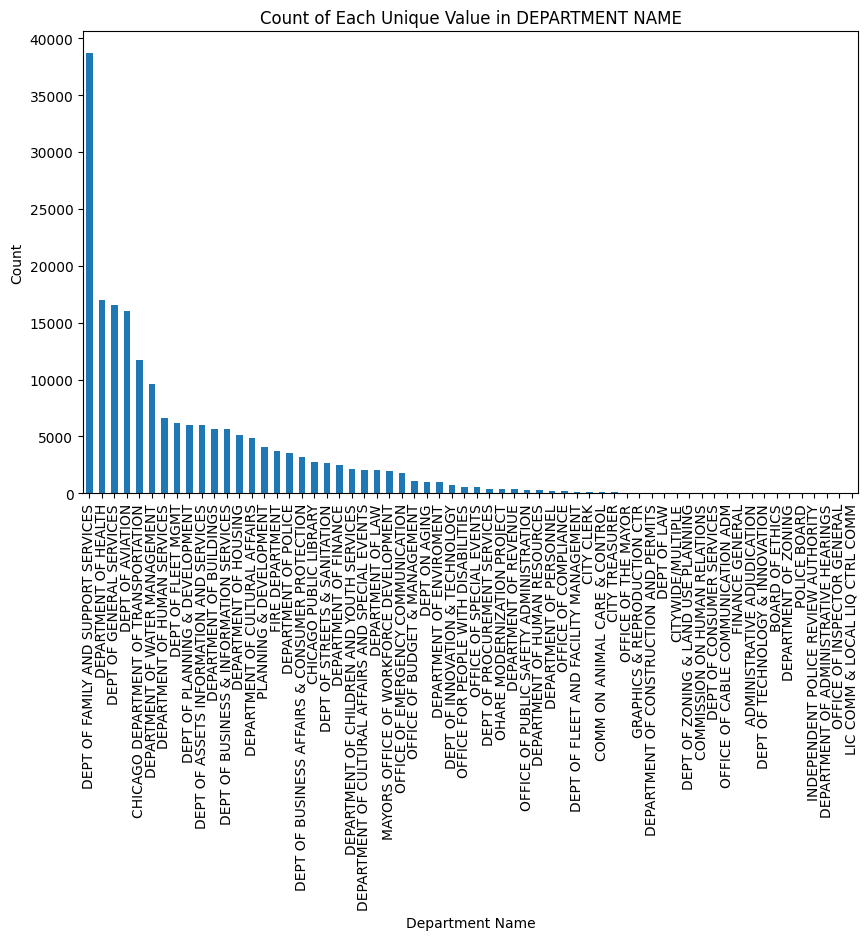

In [120]:
# Get the count of each unique value in the 'DEPARTMENT NAME' column
department_counts = df['DEPARTMENT NAME'].value_counts()

# Plot the counts as a bar chart
department_counts.plot(kind='bar', figsize=(10, 6))

# Add labels and title for better readability
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.title('Count of Each Unique Value in DEPARTMENT NAME')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()

In [31]:
# Define the possible fill values
fill_values = ['DEPT OF FAMILY AND SUPPORT SERVICES', 'DEPARTMENT OF HEALTH', 'DEPT OF GENERAL SERVICES', 'DEPT OF AVIATION', 'CHICAGO DEPARTMENT OF TRANSPORTATION'  ]

# Function to randomly select a fill value
def random_fill():
    return np.random.choice(fill_values)

# Apply random fill to missing values'
df['DEPARTMENT NAME'] = df['DEPARTMENT NAME'].fillna(random_fill)

# Optionally, you can verify if there are any missing values left
missing_count = df['DEPARTMENT NAME'].isnull().sum()
print(f"Number of missing values after filling: {missing_count}")

KeyError: 'DEPARTMENT NAME'

In [133]:
# Find the mode of the 'DEPARTMENT NAME' column
# department_mode = df['DEPARTMENT NAME'].mode()

# print(f"Most frequent value(s) in 'DEPARTMENT NAME':")
# print(department_mode)

In [134]:
# Fill missing values in the 'DEPARTMENT NAME' column with 'DEPT OF FAMILY AND SUPPORT SERVICES'
# df['DEPARTMENT NAME'] = df['DEPARTMENT NAME'].fillna('DEPT OF FAMILY AND SUPPORT SERVICES')

# Optionally, you can verify if there are any missing values left
# missing_count = df['DEPARTMENT NAME'].isnull().sum()
# print(f"Number of missing values after filling: {missing_count}")

In [132]:
# Count the number of missing values in the 'VOUCHER NUMBER' column
missing_count = df['DEPARTMENT NAME'].isnull().sum()

print(f"Number of missing values in 'DEPARTMENT NAME': {missing_count}")

Number of missing values in 'DEPARTMENT NAME': 0


In [130]:
print(df.columns)


Index(['VOUCHER NUMBER', 'AMOUNT', 'CHECK DATE', 'DEPARTMENT NAME',
       'CONTRACT NUMBER', 'VENDOR NAME', 'CASHED'],
      dtype='object')


In [30]:
df.head()

,VOUCHER NUMBER
0,PVCI23CI705786
1,PVCI23CI705361
2,PVCI23CI705361
3,PVCI23CI705785
4,Multiple


## Ein andere Dataset

In [82]:
df=pd.read_csv(r'C:\Users\Nutzer\Desktop\BAExperiment\city_payments_fy2017.csv')

In [84]:
df.head()

,fy,fm,check_date,document_no,dept,department_title,char_,character_title,sub_obj,sub_obj_title,vendor_name,doc_ref_no_prefix,doc_ref_no_prefix_definition,contract_number,contract_description,transaction_amount
0,2017,10,2017-04-12,CHEK17119771,42,42 COMMERCE,2,02 PURCHASE OF SERVICES,231,OVERTIME MEALS 0231,EAT AT JOE'S,PVXX,payment voucher,NaN,NaN,66.82
1,2017,12,2017-06-09,ACHD17177233,26,26 LICENSES & INSPECTIONS,2,02 PURCHASE OF SERVICES,211,TRANSPORTATION 0211,L & I Â TRAVEL IMPREST FUND,PVXX,payment voucher,NaN,NaN,127.33
2,2017,5,2016-11-25,CHEK17063736,44,44 LAW,2,02 PURCHASE OF SERVICES,258,COURT REPORTERS 0258,"MARLENE BELL REPORTING, INC.",PVXX,payment voucher,NaN,NaN,454.20
3,2017,1,2016-07-07,CHEK17000247,11,11 POLICE,2,02 PURCHASE OF SERVICES,260,REPAIR AND MAINTENANCE CHARGES 0260,RICOH AMERICAS CORPORATION,VCXX,procurement,NaN,NaN,50.00
4,2017,1,2016-07-08,ACHD17000233,23,23 PRISONS,3,03 MATERIALS AND SUPPLIES,313,FOOD 0313,PHILADELPHIA PRISONS,PCXX,petty cash,NaN,NaN,71.92


In [85]:
df.dtypes

fy                                int64
fm                                int64
check_date                       object
document_no                      object
dept                              int64
department_title                 object
char_                             int64
character_title                  object
sub_obj                          object
sub_obj_title                    object
vendor_name                      object
doc_ref_no_prefix                object
doc_ref_no_prefix_definition     object
contract_number                  object
contract_description             object
transaction_amount              float64
dtype: object

In [86]:
ohe= OneHotEncoder()

In [87]:
print(ohe)

OneHotEncoder()


In [89]:
df["doc_ref_no_prefix_definition"].unique()

array(['payment voucher', 'procurement', 'petty cash',
       'professional services', 'auto parts', 'library books',
       'court appointed attorneys', 'American Express travel vouchers',
       'reimbursable expense vouchers for City employees',
       'monthly rent and quarterly MH/MR', 'funeral directors', nan],
      dtype=object)

In [88]:
ohe.fit_transform(df[["doc_ref_no_prefix_definition"]]).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [90]:

feature_arry= ohe.fit_transform(df[["doc_ref_no_prefix_definition"]]).toarray()

In [91]:
ohe.categories_

[array(['American Express travel vouchers', 'auto parts',
        'court appointed attorneys', 'funeral directors', 'library books',
        'monthly rent and quarterly MH/MR', 'payment voucher',
        'petty cash', 'procurement', 'professional services',
        'reimbursable expense vouchers for City employees', nan],
       dtype=object)]

In [92]:
feature_labels= ohe.categories_


In [93]:
np.array(feature_labels).ravel()

array(['American Express travel vouchers', 'auto parts',
       'court appointed attorneys', 'funeral directors', 'library books',
       'monthly rent and quarterly MH/MR', 'payment voucher',
       'petty cash', 'procurement', 'professional services',
       'reimbursable expense vouchers for City employees', nan],
      dtype=object)

In [94]:
print(feature_labels)

[array(['American Express travel vouchers', 'auto parts',
       'court appointed attorneys', 'funeral directors', 'library books',
       'monthly rent and quarterly MH/MR', 'payment voucher',
       'petty cash', 'procurement', 'professional services',
       'reimbursable expense vouchers for City employees', nan],
      dtype=object)]


In [95]:
pd.DataFrame(feature_arry, columns=feature_labels)

,American Express travel vouchers,auto parts,court appointed attorneys,funeral directors,library books,monthly rent and quarterly MH/MR,payment voucher,petty cash,procurement,professional services,reimbursable expense vouchers for City employees,NaN
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
238889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
238890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
238891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
238892,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Die Zweite Data set für Philadelphia Data wurde 
